In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.makedirs('../Figure/Figure2', exist_ok=True)

# load raw data

In [3]:
# obtain TE metadata
Dfam_RM_family = pd.read_csv('../data/TE/TE_metadata_with_Liftover.csv')
Dfam_RM_family.index = Dfam_RM_family['repeat subfamily name']
Dfam_RM_family_dict = Dfam_RM_family.to_dict()
Dfam_RM_family.head()

,repeat subfamily name,repeat family name,repeat class,repeat classification,repeat region,repeat consensus length,repeat copy count,repeat copy count after filtering,branch
repeat subfamily name,,,,,,,,,
5S,5S,5S,rRNA,NaN,NaN,121,1224,189.0,Amniota
7SK,7SK,7SK,snRNA,NaN,NaN,331,508,23.0,Boreoeutheria
7SLRNA,7SLRNA,7SLRNA,SINE,Alu,NaN,320,4105,569.0,Primates
ACRO1,ACRO1,ACRO1,Satellite,acromeric,NaN,147,291,248.0,Mammalia
ALRa,ALRa,ALR,Satellite,centromeric,NaN,172,28338,25082.0,Homininae


In [4]:
# obtain TE targets
KZFP_target = pd.read_csv('../data/targets/TE_targets_for_analysis.csv')
display(KZFP_target.head())


# obtain KRAB-ZFP metadata
KZFP_dataset_df = pd.read_csv('../data/ChIP-seq/KZFP_metadata.csv', index_col=0)
KZFP_dataset_df = KZFP_dataset_df[KZFP_dataset_df['classification (Genome research)']=='protein_coding']
KZFP_dataset_dict = KZFP_dataset_df.to_dict()
KZFP_dataset_df

,KZFP gene symbol,repeat subfamily name,ratio,p value,q value,log10 q value,normalized score,rank,criteria,overlap peak count to all copies,...,repeat class,repeat classification,emergence era of TE subfamily,evolutionary age of TE subfamily,emegence era of TE subfamily is in primate,emergence era of KZFP for analysis,evolutionary age of KZFP for analysis,evolutionary age of KZFP in Imbeault et al.,evolutionary age of KZFP in Tribolet-Hardy et al.,emegence era of KZFP is in primate
0,ZNF93,L1P1_5end,150.130049,0.000000e+00,3.611620e-321,320.442298,1.000000,Primary,True,1718,...,LINE,L1,Hominoidea,20.2,True,Homininae,9.1,19.9,9.1,True
1,ZNF93,L1P2_5end,65.562098,0.000000e+00,3.611620e-321,320.442298,1.000000,Primary,True,527,...,LINE,L1,Catarrhini,29.4,True,Homininae,9.1,19.9,9.1,True
2,ZNF92,THE1D-int,233.763677,1.983704e-270,2.900175e-267,266.537576,1.000000,Primary,True,132,...,ERV/LTR,ERV/LTR,Simiiformes,43.2,True,Simiiformes,43.2,43.1,43.2,True
3,ZNF90,HERVH_3,31.989636,5.512524e-100,8.059310e-97,96.093702,1.000000,Primary,True,90,...,ERV/LTR,ERV/LTR,Hominidae,15.8,True,Homininae,9.1,15.8,9.1,True
4,ZNF90,HERVH_1,32.425278,1.657565e-89,1.211680e-86,85.916612,0.894092,Secondary,True,80,...,ERV/LTR,ERV/LTR,Hominidae,15.8,True,Homininae,9.1,15.8,9.1,True


,gene_name,gene_id,classification (Genome research),Age,Age (Genome research),Age adjusted,Species,KRAB domain,interactK1,interact with,Number of ZNFs,z_C2H2_miss,cluster
PRDM7,NaN,NaN,protein_coding,NaN,352.0,352.0,NaN,NaN,NaN,NaN,NaN,NaN,noCluster
ZNF705A,ZNF705A,ENSG00000196946,protein_coding,0.0,312.0,312.0,Human,NaN,Not in database,Not in database,3.0,-0.910143,noCluster
ZNF705B,ZNF705B,ENSG00000215356,protein_coding,0.0,312.0,312.0,Human,NaN,Not in database,Not in database,3.0,NaN,noCluster
ZNF705G,ZNF705G,ENSG00000215372,protein_coding,0.0,312.0,312.0,Human,NaN,Not in database,Not in database,2.0,6.659968,noCluster
ZNF212,ZNF212,ENSG00000170260,protein_coding,179.2,312.1,312.0,Platypus,NaN,NO,NaN,3.0,-0.910143,chr7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF724,NaN,NaN,protein_coding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr19.4
ZNF735,NaN,NaN,protein_coding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr7.1
ZNF738,NaN,NaN,protein_coding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr19.4
ZNF875,NaN,NaN,protein_coding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noCluster


# process raw data

In [5]:
branch_dict = {'Vertebrata':530, 'Dipnotetrapodomorpha':413, 'Tetrapoda':352, 'Amniota':312.1, 'Mammalia':179.2, 'Theria':159, 'Eutheria':105, 'Boreoeutheria':96, 'Euarchontoglires': 90, 'Primatomorpha':76, 
               'Primates':74, 'Haplorrhini':63, 'Simiiformes':43.2, 'Catarrhini':29.4, 'Hominoidea':20.2, 'Hominidae':15.8, 'Homininae':9.1, 'Hominini':6.7, 'Homo sapiens':0, np.nan:None}

Age_dict = {352.0: 'Tetrapoda', 312.1: 'Amniota', 312.0: 'Amniota', 163.7:'Mammalia', 159.0: 'Theria', 105.0: 'Eutheria', 96.0: 'Boreoeutheria', 97.5: 'Boreoeutheria', 90.0: 'Euarchontoglires', 90.9: 'Euarchontoglires', 76: 'Primatomorpha', 75.9: 'Primatomorpha', 
            74.0: 'Primates', 63: 'Haplorrhini', 43.2:'Simiiformes', 43.1:'Simiiformes', 29.4: 'Catarrhini', 29.1: 'Catarrhini', 20.2:'Hominoidea', 15.8: 'Hominidae', 9.1: 'Homininae', 6.7: 'Hominini', 0: 'Homo sapiens', 'nan': np.nan}

Dfam_RM_family['Age'] = Dfam_RM_family['branch'].apply(lambda x:branch_dict[x])

# analysis processed data

## Fig.2A

['ERV/LTR 979', 'LINE 313', 'Retroposon 101', 'SINE 87', 'DNA 24']


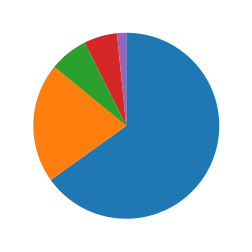

In [7]:
fig = plt.figure(figsize=[3, 4])

data = KZFP_target['repeat class'].value_counts()
value = data.values
label = data.index

plt.pie(value, counterclock=False, startangle=90)

print(['{} {}'.format(TE, v) for TE, v in zip(label, value)])

fig.savefig('../Figure/Figure2/Figure2A.png', dpi=300)
fig.savefig('../Figure/Figure2/Figure2A.pdf', transparent=True, dpi=300)

## Fig.2B

614


/Users/m.kosuge/opt/anaconda3/envs/arms_race_all/lib/python3.9/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


<Figure size 640x480 with 0 Axes>

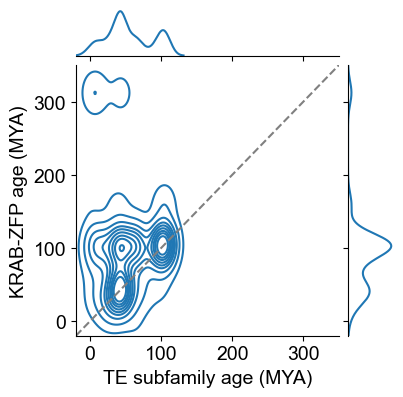

In [8]:
fig = plt.figure(dpi=100)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

primary_df = KZFP_target[KZFP_target['rank']=='Primary']
data = primary_df[['evolutionary age of TE subfamily', 'evolutionary age of KZFP for analysis']].dropna()
x = data['evolutionary age of TE subfamily'].rename('TE subfamily age (MYA)')
y = data['evolutionary age of KZFP for analysis'].rename('KRAB-ZFP age (MYA)')

print(len(data))

# jointplot
p = sns.jointplot(x=x, y=y, linewidth=0, kind='kde', height=4.2)

# 対角線
x = np.linspace(-20, 350)
p.ax_joint.plot(x, x, color='grey', linestyle='dashed')

p.ax_marg_x.set_xlim(-20, 350)
p.ax_marg_y.set_ylim(-20, 350)
p.ax_marg_y.set_yticks([0, 100, 200, 300])


# output
plt.savefig('../Figure/Figure2/Figure2B.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Figure2/Figure2B.pdf', bbox_inches='tight', transparent=True, dpi=300)

plt.show()